In [1]:
#importar pandas, matplotlib y math
import pandas as pd
import matplotlib.pyplot as plt
import math

#crear lista de datos
data_2 = {'rep_horas': [4.3, 3.1, 6.6, 3.0, 2.7, 4.5, 2.0,
                        6.9, 3.8, 5.7, 4.4, 5.9, 3.5, 5.5,
                        5.6, 4.1, 5.2, 3.2, 3.3, 3.7]}
#convertir lista a dataframe y ordenar de manera ascendente
df2 = pd.DataFrame(data_2).sort_values('rep_horas')
df2

,rep_horas
6,2.0
4,2.7
3,3.0
1,3.1
17,3.2
18,3.3
12,3.5
19,3.7
8,3.8
15,4.1


a) Calcular numero de intervalos con regla de Sturges

In [2]:
bin_no = 1 + int(math.log10(len(df2))*(3.32))
parametros_frec = {'no_inter': bin_no,
     'ancho' : round((max(df2['rep_horas']-min(df2['rep_horas']))/bin_no))}
parametros_frec

{'no_inter': 5, 'ancho': 1}

In [3]:
#crear una columna condicional en base al numero de intervalos
df2['interv'] = '2-3'
df2.loc[(df2['rep_horas'] >= 2 ) 
       & (df2['rep_horas'] < 3), 'interv'] = '2-3'
df2.loc[(df2['rep_horas'] >= 3 ) 
       & (df2['rep_horas'] < 4), 'interv'] = '3-4'
df2.loc[(df2['rep_horas'] >= 4 ) 
       & (df2['rep_horas'] < 5), 'interv'] = '4-5'
df2.loc[(df2['rep_horas'] >= 5 ) 
       & (df2['rep_horas'] < 6), 'interv'] = '5-6'
df2.loc[(df2['rep_horas'] >= 6 ) 
       & (df2['rep_horas'] < 7), 'interv'] = '6-7'
df2.reset_index(drop = True)

,rep_horas,interv
0,2.0,2-3
1,2.7,2-3
2,3.0,3-4
3,3.1,3-4
4,3.2,3-4
5,3.3,3-4
6,3.5,3-4
7,3.7,3-4
8,3.8,3-4
9,4.1,4-5


In [4]:
#agrupar los datos en la variable categorica nueva
df3 = df2.groupby(['interv'])['rep_horas'].count().reset_index()
df3.rename(columns = {'rep_horas' : 'frec'})

,interv,frec
0,2-3,2
1,3-4,7
2,4-5,4
3,5-6,5
4,6-7,2


In [5]:
#agregar columna para calcular la frecuencia relativa
df3['frec_r'] = (df3['rep_horas']/len(df2))
df3['frec_p'] = (df3['rep_horas']/len(df2))*100
df3

,interv,rep_horas,frec_r,frec_p
0,2-3,2,0.10,10.0
1,3-4,7,0.35,35.0
2,4-5,4,0.20,20.0
3,5-6,5,0.25,25.0
4,6-7,2,0.10,10.0


b) histograma y poligono de frecuencias

Text(0.5, 0, 'Intervalos')

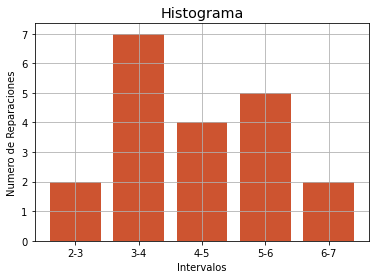

In [6]:
#creacion de histograma, usando df3
fig, ax = plt.subplots()
ax.bar(df3['interv'], df3['rep_horas'], color = '#CD5430')
plt.style.use('ggplot')
plt.grid(True)
plt.title('Histograma')
ax.set_ylabel("Numero de Reparaciones")
ax.set_xlabel('Intervalos')

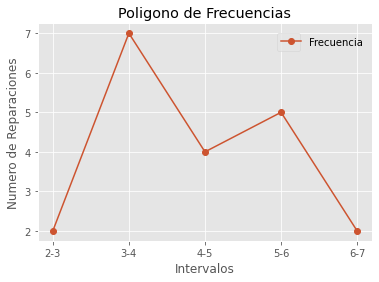

In [7]:
#creacion de poligono de frecuencias, mismo codigo anterior
fig, ax = plt.subplots()
ax.plot(df3['interv'], df3['rep_horas'],
        color = '#CD5430',
       marker = "o",
       label='Frecuencia')
plt.style.use('ggplot')
plt.grid(True)
plt.title('Poligono de Frecuencias')
ax.set_ylabel("Numero de Reparaciones")
ax.set_xlabel('Intervalos')
ax.legend(bbox_to_anchor=(0.7,.85,.1,1),ncol=1,
mode='expand', loc='lower left')

c) Calcule la media aritmetica, mediana y moda de datos no agrupados

In [8]:
df2_mean = df2['rep_horas'].mean()
df2_median = df2['rep_horas'].median()
# encontrar la frecuencia maxima con max()
moda_int = max(df3['rep_horas'])
# encontrar con .query el registro correspondiente a la frecuencia maxima
moda = df3.query('rep_horas == 7')['interv']


In [9]:
c = {'media': df2_mean, 'mediana' : round(df2_median, ndigits=1),
    'moda': 'inter 3-4'}
print(f'medidas de datos no agrupados: \n{c}')

medidas de datos no agrupados: 
{'media': 4.35, 'mediana': 4.2, 'moda': 'inter 3-4'}


In [10]:
# media agrupada
df3['punto_medio'] = [2.5,3.5,4.5,5.5,6.5]
df3.rename(columns = {'rep_horas': 'frecuencia'}).drop(columns = ['frec_r', 'frec_p'])
df3['multiplicacion'] = [5, 24.5, 18, 27.5, 13]
df3.rename(columns = {'rep_horas': 'frecuencia'}).drop(columns = ['frec_r', 'frec_p'])
df3.sum()
media_agrupada = 88/20
media_agrupada

4.4

In [11]:
#mediana agrupada
mediana_agrupada = 4 + ((10-7)/4)*2
mediana_agrupada

5.5

In [12]:
# desviacion estandar
df2_std = df2['rep_horas'].std()
df2_std


1.3570478795416252

In [13]:
# coeficiente de asimetria
as_ = 3*(df2_mean - df2_median)/(df2_std)
as_

0.33160215404632526

In [14]:
kurt = df2['rep_horas'].kurt()
kurt



-0.7882060622100036

/Users/ivanwilcox/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

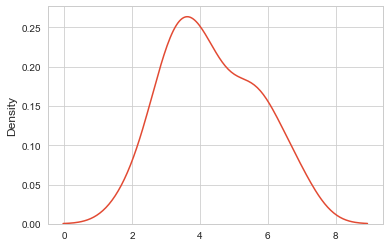

In [15]:
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
sns.kdeplot(np.array(df2['rep_horas']), bw=0.5)

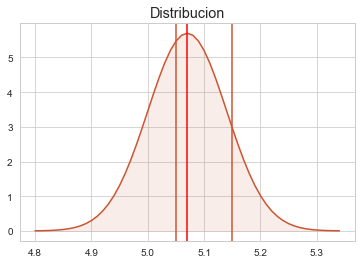

In [151]:
from scipy.stats import norm
import statistics
  
# graficar desde 5.05 hastqa 5.15 con incrementos de 0.01
x_axis = np.arange(4.8, 5.35, 0.01)
  
# Calculating mean and standard deviation
mean = 5.07
sd = 0.07
  
#plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
fig, ax = plt.subplots()
ax.plot(x_axis, norm.pdf(x_axis, mean, sd) , color='#CD5430', alpha=1.00)
ax.fill_between(x_axis,norm.pdf(x_axis, mean, sd), 0, color='#CD5430', alpha=.1)
plt.title('Distribucion')
plt.axvline(x = mean, color = 'r', label = '')
plt.axvline(x = (5.05),color = '#CD5430', label = '')
plt.axvline(x = (5.15),color = '#CD5430', label = '')
#plt.axvline(x = (mean+sd), color = '#CD5430', label = '')
#plt.axvline(x = (mean-2*sd), color = '#CD5430', label = '')
#plt.axvline(x = (mean+2*sd), color = '#CD5430', label = '')







In [155]:
import math
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom
normpdf(7,5,5)  

0.07365402806066466

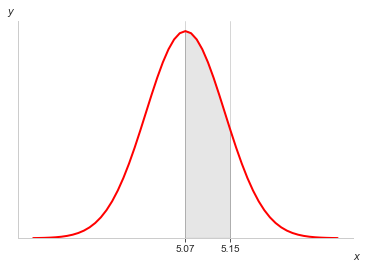

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

x_axis = np.arange(4.8, 5.35, 0.01)

def func(x):
    return norm.pdf(x, mean, sd)

a, b = 5.07, 5.15  # integral limits
x = x_axis
y = norm.pdf(x_axis, mean, sd)

fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_yticks([])
ax.set_xticks([a, b])

plt.show()